In [23]:
%config Completer.use_jedi = False

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, uniform, gaussian_kde
from sklearn.neighbors import KernelDensity

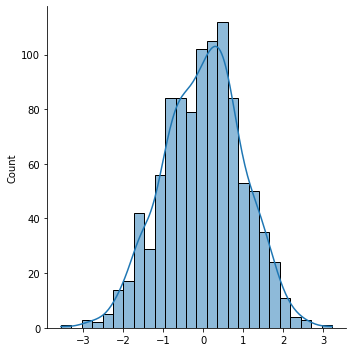

In [5]:
x = norm.rvs(size=1000)
sns.displot(x, kde = True)

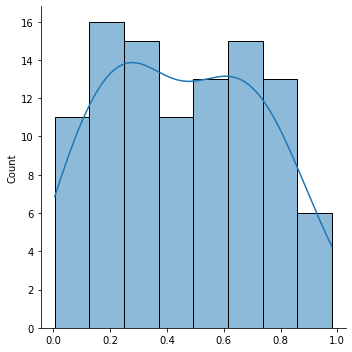

In [24]:
x_u = uniform.rvs(size = 100)
sns.displot(x_u, kde=True)

In [43]:
X = np.linspace(0 , 3*np.pi, 100)

In [47]:
y = 0.3*X + 1 + norm.rvs(scale=0.5, size=100)

In [48]:
Z = 0.3*X + 1 + norm.rvs(scale=0.5, size=100)     

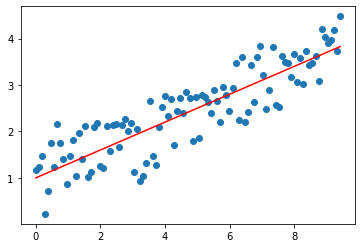

In [49]:
plt.scatter(X, y)
plt.plot(X, Z, c='r')

# kernel estimation Scipy

In [2]:
data = norm.rvs(size = 50000, loc = 0, scale = 1)

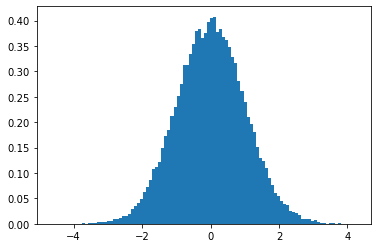

In [10]:
plt.hist(data, bins= 100, density = True)
plt.show()

In [11]:
kernel = gaussian_kde(data)
type(kernel)

scipy.stats.kde.gaussian_kde

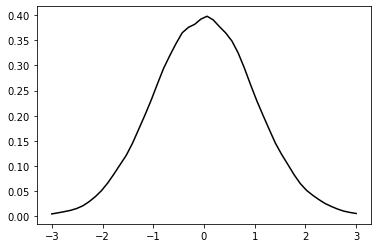

In [12]:
u = np.linspace(-3,3,50) # LOs puntos donde se va a evaluar
v = kernel.evaluate(u)
plt.plot(u,v, 'k')
plt.show()

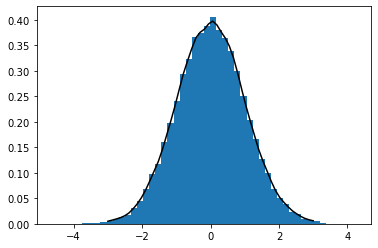

In [13]:
plt.hist(data, bins=50, density = True)
plt.plot(u,v, 'k')
plt.show()

Crear datos de la estimación

In [14]:
sample = kernel.resample(100000)

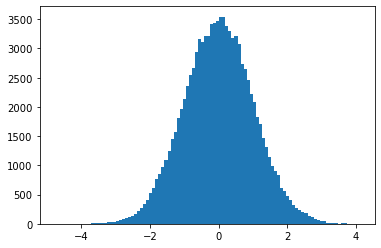

In [15]:
plt.hist(sample[0], bins = 100 )
plt.show()

In [16]:
bw = kernel.factor * np.std(data) # El parámetro de suavizado, band width
bw

0.11493442025621904

# Kernel stimation sklearn

In [3]:
data_r = data.reshape(-1,1)

In [18]:
sklearn_kernel = KernelDensity(kernel= 'gaussian', bandwidth= bw).fit(data_r)

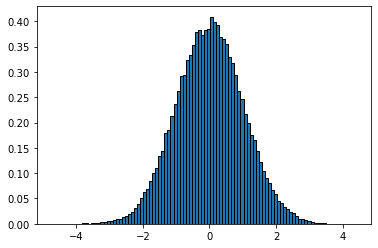

In [19]:
sample = sklearn_kernel.sample(100000)

plt.hist(sample, bins = 100,density = True ,edgecolor = 'black')
plt.show()

In [25]:
sklearn_kernel.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 0.11493442025621904,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}